In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('pima-indian-diabetes.csv',index_col=0) ## loading the data
df.head()

,148,72,35,0,33.6,0.627,50,1
6,,,,,,,,
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [3]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [4]:
## splitting independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X.shape,y.shape

((767, 7), (767,))

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [7]:
y_train

6
8     1
7     0
3     0
6     0
1     0
     ..
13    1
4     0
2     0
12    0
1     0
Name: 1, Length: 613, dtype: int64

In [8]:
model.fit(X_train,y_train) ## fitting the model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [9]:
y_pred = model.predict(X_test) 

In [10]:
recall_score(y_test,y_pred)

0.6666666666666666

In [11]:
precision_score(y_test,y_pred)

0.6129032258064516

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        97
           1       0.61      0.67      0.64        57

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154



In [13]:
cm = confusion_matrix(y_pred,y_test)

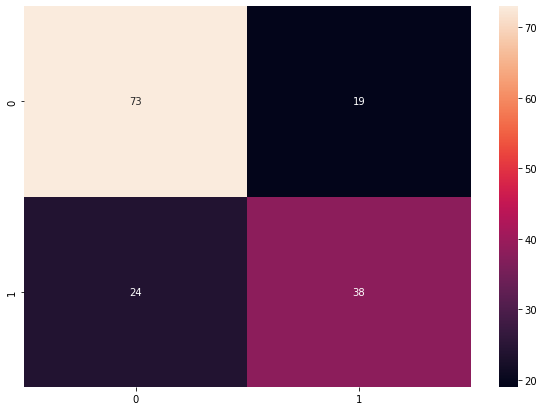

In [14]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True);

## Hyperparameter turning for finding best base_estimator parameters

In [15]:
tree = DecisionTreeClassifier()
clf1 = GridSearchCV(tree,
    {'criterion':['gini','entropy'],
    'min_samples_split':[2,3,4],
    'max_depth':[2,3,4]},
    cv =3
)

In [16]:
clf1.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [17]:
clf1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

## Trying Hyperparameter turning to find out the best hyperparameters for our Adaboost

In [18]:
model = AdaBoostClassifier(clf1.best_estimator_)
model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2))

In [19]:
n_estimators = [10,30,50,80,100,150]
learning_rate = [0.001,0.01,0.05,0.1,0.5]
algorithm = ['SAMME','SAMME.R']
params = dict(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm)
params

{'n_estimators': [10, 30, 50, 80, 100, 150],
 'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
 'algorithm': ['SAMME', 'SAMME.R']}

In [20]:
clf = GridSearchCV(estimator=model,param_grid=params,cv=3)

In [21]:
clf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=2)),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [10, 30, 50, 80, 100, 150]})

In [22]:
clf.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2),
                   learning_rate=0.1, n_estimators=30)

In [23]:
clf_predict = clf.best_estimator_.predict(X_test)

In [24]:
precision_score(y_test,clf_predict)

0.7291666666666666

In [25]:
recall_score(y_test,clf_predict)

0.6140350877192983

In [26]:
print(classification_report(y_test,clf_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        97
           1       0.73      0.61      0.67        57

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



## By performing Hyperparameter turning we are able to increase precision,recall and accuracy

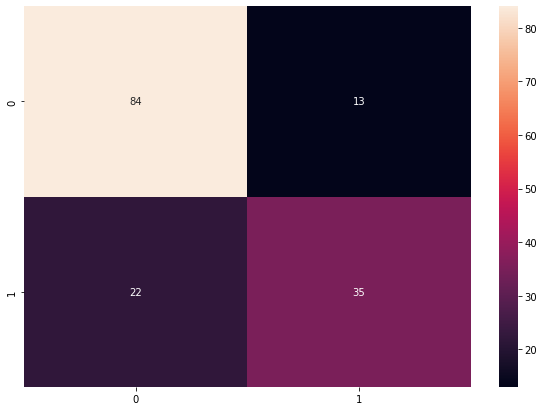

In [27]:
cm = confusion_matrix(y_test,clf_predict)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True);

In [28]:
accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,clf_predict)

(0.8221859706362153, 0.7727272727272727)

## By observing our training accuracy and testing accuracy we can conclude that our model is not overfitting because the training accuracy is not much greater than testing accuracy